<a href="https://colab.research.google.com/github/Tony607/mmdetection_instance_segmentation_demo/blob/master/mmdetection_train_custom_coco_data_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to create custom COCO data set for instance segmentation](https://www.dlology.com/blog/how-to-create-custom-coco-data-set-for-instance-segmentation/) | DLology blog

## Install Open MMLab Detection Toolbox

In [1]:
import os
from os.path import exists, join, basename, splitext

# TODO: change URL to your fork of my repository if necessary.
git_repo_url = 'https://github.com/Tony607/mmdetection_instance_segmentation_demo'

%cd /content
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
mmdetection_dir = os.path.join(project_name, "mmdetection")
if not exists(project_name):
    # clone "depth 1" will only get the latest copy of the relevant files.
    !git clone -q --recurse-submodules --depth 1 $git_repo_url
    print("Update mmdetection repo")
    !cd {mmdetection_dir} && git checkout master && git pull
    # dependencies
    !pip install -q mmcv terminaltables
    # build
    !cd {mmdetection_dir} && python setup.py install
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

[Errno 2] No such file or directory: '/content'
/DATA/LOC/FacebookAI/mmdetection_instance_segmentation_demo
Update mmdetection repo
Previous HEAD position was ff28413 Remove redundant data transforms (#1522)
Switched to branch 'master'
Your branch is up to date with 'origin/master'.
Already up to date.
Error initializing plugin EntryPoint(name='Windows (alt)', value='keyrings.alt.Windows', group='keyring.backends').
Traceback (most recent call last):
  File "/home/solomon/.local/lib/python3.6/site-packages/keyring/backend.py", line 202, in _load_plugins
    init_func = ep.load()
  File "/home/solomon/.local/lib/python3.6/site-packages/importlib_metadata/__init__.py", line 93, in load
    module = import_module(match.group('module'))
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, 

     |████████████████████████████████| 42 kB 336 kB/s eta 0:00:011
     |████████████████████████████████| 72 kB 4.6 kB/s eta 0:00:011
     |████████████████████████████████| 112 kB 74 kB/s  eta 0:00:01
     |████████████████████████████████| 948 kB 2.3 MB/s eta 0:00:01     |██████████████████████████▎     | 778 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 37.6 MB 7.0 kB/s  eta 0:00:01
     |████████████████████████████████| 472 kB 9.3 kB/s eta 0:00:01


     |████████████████████████████████| 2.1 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 50.4 MB 23 kB/s  eta 0:00:01
     |████████████████████████████████| 134 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 389 kB/s eta 0:00:011
     |████████████████████████████████| 86 kB 522 kB/s eta 0:00:011
  Using cached pyquaternion-0.9.9-py3-none-any.whl (14 kB)
  Using cached Shapely-1.7.1-cp36-cp36m-manylinux1_x86_64.whl (1.0 MB)
     |████████████████████████████████| 78 kB 2.7 MB/s  eta 0:00:01
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp36-cp36m-linux_x86_64.whl size=265966 sha256=22283cfd4721525bc8e55c4614cc345dfbe4812036bb92a7f58c2cab6a0cdffc
  Stored in directory: /home/solomon/.cache/pip/wheels/79/e9/2f/545d78370691036bb34a3781984de6236882e367c97060b1ac
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8209 sha256=f8

In [3]:
# You may need to restart your runtime prior to this, to let your installation take effect.
import os
from os.path import exists, join, basename, splitext

# TODO: change URL to your fork of my repository if necessary.
git_repo_url = 'https://github.com/Tony607/mmdetection_instance_segmentation_demo'

%cd /content
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
mmdetection_dir = os.path.join(project_name, "mmdetection")

[Errno 2] No such file or directory: '/content'
/DATA/LOC/FacebookAI/mmdetection_instance_segmentation_demo


## Your settings

In [0]:
import os
import sys
sys.path.append(mmdetection_dir)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

# You can add more model configs like below.
MODELS_CONFIG = {
    'mask_rcnn_r50_fpn_1x': {
        'config_file': 'configs/mask_rcnn_r50_fpn_1x.py'
    },
    'cascade_mask_rcnn_r50_fpn_1x': {
        'config_file': 'configs/cascade_mask_rcnn_r50_fpn_1x.py',
    }
}

In [0]:
# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'mask_rcnn_r50_fpn_1x'  # 'cascade_mask_rcnn_r50_fpn_1x'

# Total training epochs.
total_epochs = 20

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

## Modify config file

In [4]:
import os
config_fname = os.path.join(project_name, 'mmdetection', config_file)

assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

NameError: name 'config_file' is not defined

In [5]:
import json
annotation_path = os.path.join(project_name, "data", "trainval.json")
json_file = open(annotation_path)
coco = json.load(json_file)
print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
print(classes_names)

[{u'supercategory': u'date', u'id': 1, u'name': u'date'}, {u'supercategory': u'fig', u'id': 2, u'name': u'fig'}, {u'supercategory': u'hazelnut', u'id': 3, u'name': u'hazelnut'}]
[u'date', u'fig', u'hazelnut']


In [6]:
import re
fname = config_fname
with open(fname) as f:
    s = f.read()
    work_dir = re.findall(r"work_dir = \'(.*?)\'", s)[0]
    # Update `num_classes` including `background` class.
    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(classes_names) + 1), s)
    s = re.sub('total_epochs = \d+',
               'total_epochs = {} #'.format(total_epochs), s)
    if "CocoDataset" in s:
        s = re.sub("data_root = 'data/coco/'",
                   "data_root = 'data/'", s)
        s = re.sub("annotations/instances_train2017.json",
                   "trainval.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "trainval.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "trainval.json", s)
        s = re.sub("train2017", "images", s)
        s = re.sub("val2017", "images", s)
    else:
        s = re.sub('img_prefix=.*?\],',
                   "img_prefix=data_root + 'images',".format(total_epochs), s)
with open(fname, 'w') as f:
    f.write(s)
!cat {config_fname}

NameError: name 'config_fname' is not defined

## Train the model

In [7]:
%cd {project_name}
!python mmdetection/tools/train.py {config_fname}

/DATA/LOC/FacebookAI/mmdetection_instance_segmentation_demo/mmdetection_instance_segmentation_demo
  File "mmdetection/tools/train.py", line 131
    log_file = osp.join(cfg.work_dir, f'{timestamp}.log')
                                                       ^
SyntaxError: invalid syntax


### Verify the checkpoint file exists.

In [8]:
%cd {project_name}
checkpoint_file = os.path.join(work_dir, "latest.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

/DATA/LOC/FacebookAI/mmdetection_instance_segmentation_demo/mmdetection_instance_segmentation_demo


NameError: name 'work_dir' is not defined

## Test predict

Turn down the `score_thr` if you think the model is missing any bbox.
Turn up the `score_thr` if you see too much overlapping bboxes with low scores.

In [9]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result, init_detector

ImportError: No module named mmcv

In [10]:
score_thr = 0.5

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results
img = 'data/images/15.jpg'

result = inference_detector(model, img)
show_result(img, result, classes_names,
            score_thr=score_thr, out_file="result.jpg")

NameError: name 'init_detector' is not defined

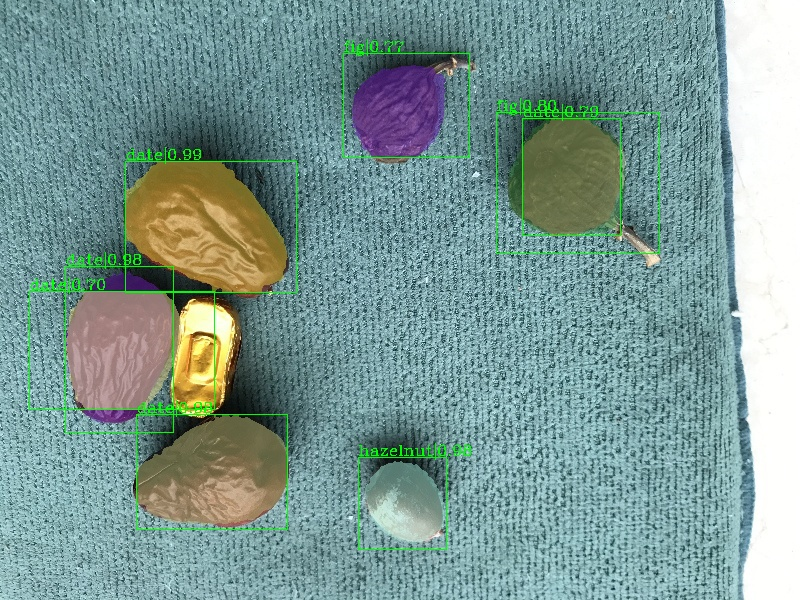

In [11]:
from IPython.display import Image
Image(filename='result.jpg')

## Benchmark inference speed

In [14]:
import time
import numpy as np

times = []
for i in range(20):
    start_time = time.time()
    result = inference_detector(model, img)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.41,fps:2.45


## Download the config file

In [0]:
from google.colab import files

files.download(config_fname)

## Download checkpoint file.

### Option1 : upload the checkpoint file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp {checkpoint_file} /content/drive

### Option2 :  Download the checkpoint file directly to your local file system
This method may not be stable when downloading large files like the model checkpoint file. Try **option 1** instead if not working.

In [0]:
from google.colab import files
files.download(checkpoint_file)